## Train Deep Learning Model

### Step-1: load the preprocessing data

In [1]:
import os
import numpy as np
import cv2
import gc

In [2]:
# load the preprocessing data
data = np.load("./data_preprocessing/data_preprocesiing.npz")

In [3]:
X = data['arr_0']
y = data['arr_1']

### Split the data into Train and Test sets

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8160, 100, 100, 3), (2041, 100, 100, 3), (8160, 4), (2041, 4))

### Build Deep Learing Model

In [2]:
# Check GPU for trainning
import tensorflow as tf

gpu_available = tf.test.is_gpu_available()
gpu_available

2022-01-09 20:54:33.702725: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


True

2022-01-09 20:54:33.703013: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-09 20:54:33.703193: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-09 20:54:33.703422: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-09 20:54:33.703597: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-09 20:54:33.703743: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /device:GPU:0 with 2

In [6]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential

# convolution neural network
model = Sequential([
    layers.Conv2D(16, (3, 3), padding="same", input_shape=(100, 100, 3), activation="relu"), 
    layers.MaxPool2D(), 
    layers.Conv2D(32, (3, 3), padding="same", activation="relu"), 
    layers.MaxPool2D(), 
    layers.Conv2D(64, (3, 3), padding="same", activation="relu"), 
    layers.MaxPool2D(), 
    layers.Flatten(), 
    layers.Dense(192, activation="relu"), 
    layers.Dropout(0.2),
    layers.Dense(28, activation="relu"), 
    layers.Dense(4, activation="softmax")
])

# Compiling CNN model
model.compile(optimizer="rmsprop", 
             loss=tf.losses.categorical_crossentropy,
             metrics=['accuracy'])

2021-12-09 15:03:42.919369: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-09 15:03:43.007002: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-09 15:03:43.007159: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-09 15:03:43.008153: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0

In [8]:
# Trainning CNN model
history = model.fit(x=X_train, 
          y=y_train, 
          validation_data=(X_test, y_test), 
          epochs=10, 
          batch_size=16)

2021-12-09 15:03:43.607986: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 979200000 exceeds 10% of free system memory.
2021-12-09 15:03:44.153329: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 979200000 exceeds 10% of free system memory.


Epoch 1/10


2021-12-09 15:03:46.727100: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8301
2021-12-09 15:03:48.172511: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


510/510 [==============================] - ETA: 0s - loss: 0.2553 - accuracy: 0.9039

2021-12-09 15:03:52.490152: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 244920000 exceeds 10% of free system memory.
2021-12-09 15:03:52.855097: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 244920000 exceeds 10% of free system memory.


510/510 [==============================] - 9s 9ms/step - loss: 0.2553 - accuracy: 0.9039 - val_loss: 0.1304 - val_accuracy: 0.9593
Epoch 2/10
510/510 [==============================] - 4s 7ms/step - loss: 0.0903 - accuracy: 0.9716 - val_loss: 0.0860 - val_accuracy: 0.9750
Epoch 3/10
510/510 [==============================] - 4s 8ms/step - loss: 0.0703 - accuracy: 0.9789 - val_loss: 0.0634 - val_accuracy: 0.9789
Epoch 4/10
510/510 [==============================] - 4s 8ms/step - loss: 0.0529 - accuracy: 0.9830 - val_loss: 0.0579 - val_accuracy: 0.9838
Epoch 5/10
510/510 [==============================] - 4s 8ms/step - loss: 0.0429 - accuracy: 0.9866 - val_loss: 0.0573 - val_accuracy: 0.9824
Epoch 6/10
510/510 [==============================] - 4s 8ms/step - loss: 0.0387 - accuracy: 0.9884 - val_loss: 0.0765 - val_accuracy: 0.9804
Epoch 7/10
510/510 [==============================] - 4s 7ms/step - loss: 0.0320 - accuracy: 0.9911 - val_loss: 0.1195 - val_accuracy: 0.9775
Epoch 8/10
510/51

In [9]:
model.save("./model_trained/FaceMaskedTrainedModel.h5")

## Hiển thị độ chính xác

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
history_df = pd.DataFrame(history.history)

In [12]:
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.255309,0.903922,0.130432,0.959334
1,0.090281,0.971569,0.085985,0.975012
2,0.070267,0.978922,0.063381,0.978932
3,0.052913,0.982966,0.057853,0.983831
4,0.042924,0.986642,0.057316,0.982362
5,0.038746,0.988358,0.076498,0.980402
6,0.032012,0.991054,0.119540,0.977462
7,0.028755,0.990809,0.086504,0.981872
8,0.027750,0.991789,0.109291,0.978442
9,0.025613,0.993137,0.099454,0.980892


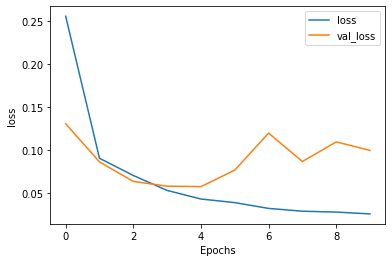

In [13]:
history_df[['loss', 'val_loss']].plot(kind='line')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show()

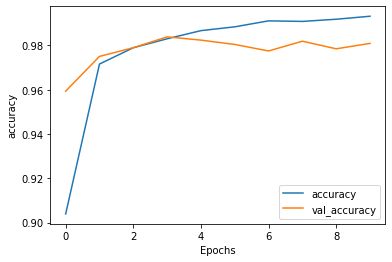

In [14]:
history_df[['accuracy', 'val_accuracy']].plot(kind='line')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.show()